# 02 - Data synthetization (GMMs) 

Gaussian Mixture Models

GMM is a probabilistic model that represents the data as a mixture of multiple Gaussian distributions. Each Gaussian component is defined by its mean and variance, and the mixture is weighted by a set of probabilities.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


In [3]:
# Load the dataset
data = pd.read_csv('age.csv')

In [4]:
# Preprocess the dataset
# Encoding 'age_group' as the target variable
label_encoder = LabelEncoder()
data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])

In [5]:
# Define features (X) and target (y)
X = data.drop(columns=['SEQN', 'age_group', 'age_group_encoded'])
y = data['age_group_encoded']

In [6]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
# Train logistic regression on the original dataset (Baseline)
log_reg_original = LogisticRegression(max_iter=1000, random_state=42)
log_reg_original.fit(X_train, y_train)
y_pred_original = log_reg_original.predict(X_test)

# Evaluate baseline metrics
original_accuracy = accuracy_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original, average='weighted')

print(f"Original Logistic Regression \n Accuracy: {original_accuracy:.2f}, \n F1 Score: {original_f1:.2f}")


Original Logistic Regression 
 Accuracy: 0.99, 
 F1 Score: 0.99


In [13]:
# Generate synthetic data using GMM
synthetic_X, synthetic_y = [], []
for class_label in np.unique(y_train):
    # Extract data for the current class
    class_data = X_train[y_train == class_label]
    
    # Fit GMM to the current class
    gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
    gmm.fit(class_data)
    
    # Generate synthetic samples for the current class
    synth_samples, _ = gmm.sample(len(class_data))  # Match the number of synthetic samples to the original class
    synthetic_X.append(synth_samples)
    synthetic_y.extend([class_label] * len(synth_samples))

# Combine synthetic data
synthetic_X = np.vstack(synthetic_X)
synthetic_y = np.array(synthetic_y)

# Combine synthetic data with original training data
X_augmented = np.vstack([X_train, synthetic_X])
y_augmented = np.hstack([y_train, synthetic_y])

In [15]:
# Train logistic regression on augmented data
log_reg_augmented = LogisticRegression(max_iter=1000, random_state=42)
log_reg_augmented.fit(X_augmented, y_augmented)
y_pred_augmented = log_reg_augmented.predict(X_test)

# Evaluate augmented model metrics
augmented_accuracy = accuracy_score(y_test, y_pred_augmented)
augmented_f1 = f1_score(y_test, y_pred_augmented, average='weighted')

print(f"Augmented Logistic Regression \n Accuracy: {augmented_accuracy:.2f} \n F1 Score: {augmented_f1:.2f}")


Augmented Logistic Regression 
 Accuracy: 0.98 
 F1 Score: 0.97


In [ ]:
# Compare metrics
print("\nComparison:")
print(f"Accuracy Improvement: {augmented_accuracy - original_accuracy:.2f}")
print(f"F1 Score Improvement: {augmented_f1 - original_f1:.2f}")

# we can that metrics improved a bit
# it can be because GMM approximates the data distribution 
# but may not capture its true complexity. This can result 
# in synthetic samples that do not add much value 
# or diversity to the training set.

# let's check some hypotheseus
# why it is like this


Comparison:
Accuracy Improvement: -0.02
F1 Score Improvement: -0.02


<Figure size 1000x600 with 0 Axes>

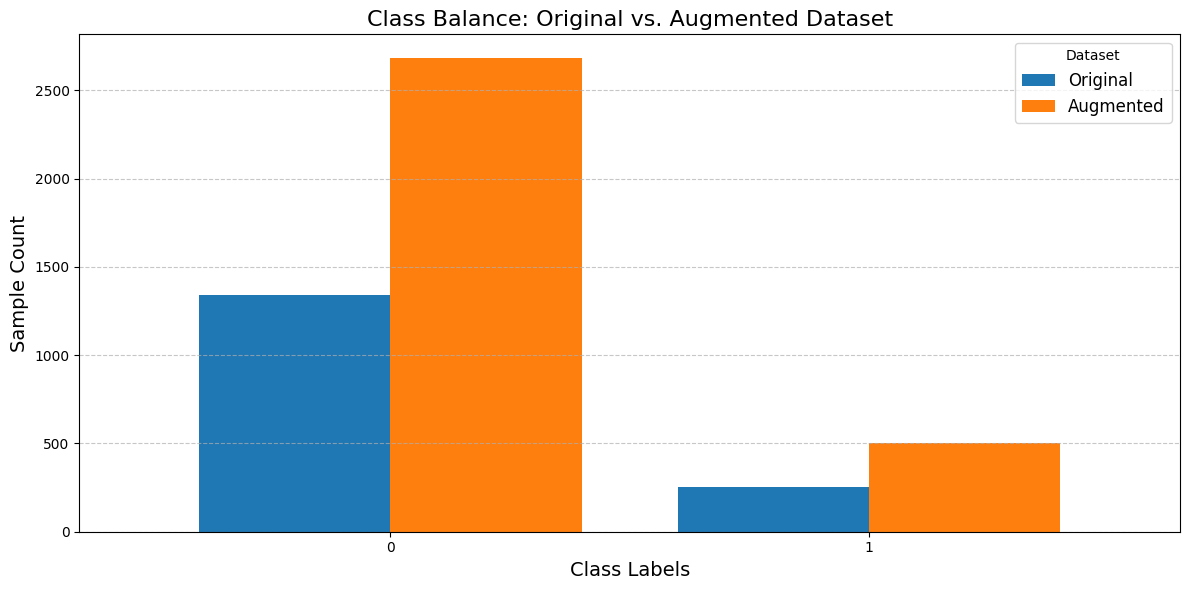

In [ ]:
# theory #1
# If the original dataset is already balanced, 
# diverse, and large enough, augmenting it may not significantly 
# improve model performance. In this case, the original data 
# likely provides sufficient information for the logistic 
# regression model to achieve high performance.

# Class Balance Comparison

# Recreate synthetic_y by re-generating synthetic data from GMM
synthetic_X, synthetic_y = [], []

for class_label in np.unique(y_train):
    # Extract data for the current class
    class_data = X_train[y_train == class_label]
    
    # Fit GMM to the current class
    gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
    gmm.fit(class_data)
    
    # Generate synthetic samples for the current class
    synth_samples, _ = gmm.sample(len(class_data))  # Match the number of synthetic samples to the original class
    synthetic_X.append(synth_samples)
    synthetic_y.extend([class_label] * len(synth_samples))

# Combine synthetic_y into a single array
synthetic_y = np.array(synthetic_y)

# Combine original and synthetic labels
y_augmented = np.hstack([y_train, synthetic_y])

# Prepare the original and augmented class distributions
original_class_counts = pd.Series(y_train).value_counts()
augmented_class_counts = pd.Series(y_augmented).value_counts()

# Combine into a DataFrame for comparison
balance_comparison = pd.DataFrame({
    'Original': original_class_counts,
    'Augmented': augmented_class_counts
}).sort_index()

# Plot the comparison
plt.figure(figsize=(10, 6))
balance_comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Class Balance: Original vs. Augmented Dataset', fontsize=16)
plt.xlabel('Class Labels', fontsize=14)
plt.ylabel('Sample Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Dataset", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# insigths:
# we have a little increase in metrics because
# the original dataset has a relatively balanced 
# distribution of classes, the logistic regression model 
# already has enough representative data 
# for each class, leading to high performance.

# While the number of samples (augmented dataset) 
# for each class has increased, 
# the relative proportions of the classes remain unchanged, 
# meaning the augmentation does NOT significantly 
# alter the balance or diversity of the dataset.

C:\Users\e1003118\AppData\Local\Temp\ipykernel_7440\3102104700.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


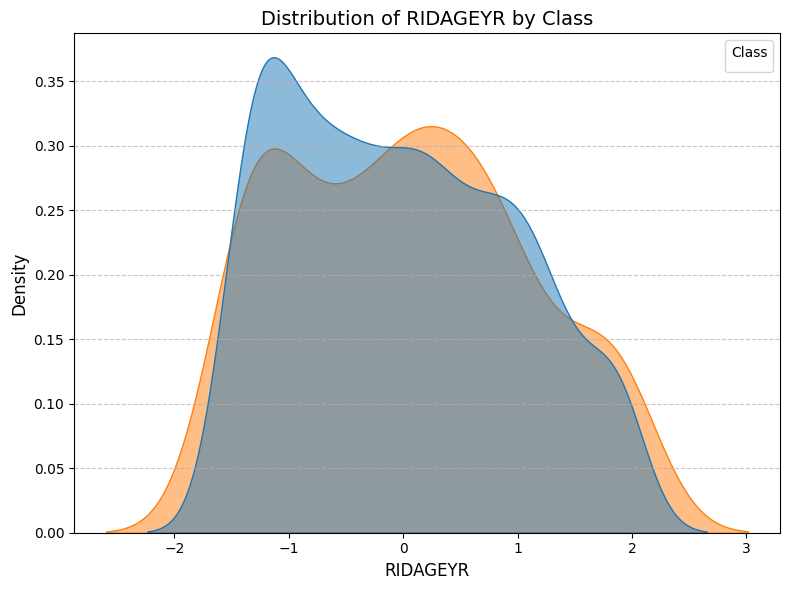

C:\Users\e1003118\AppData\Local\Temp\ipykernel_7440\3102104700.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


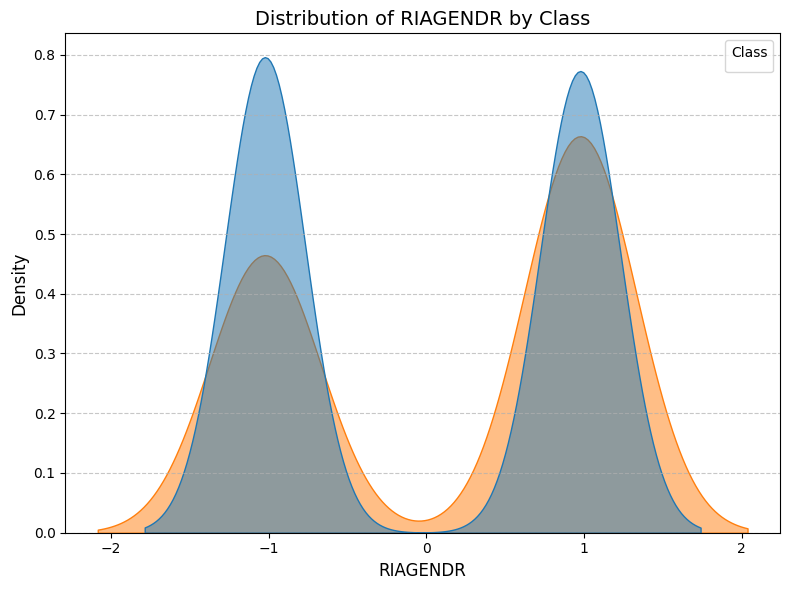

C:\Users\e1003118\AppData\Local\Temp\ipykernel_7440\3102104700.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


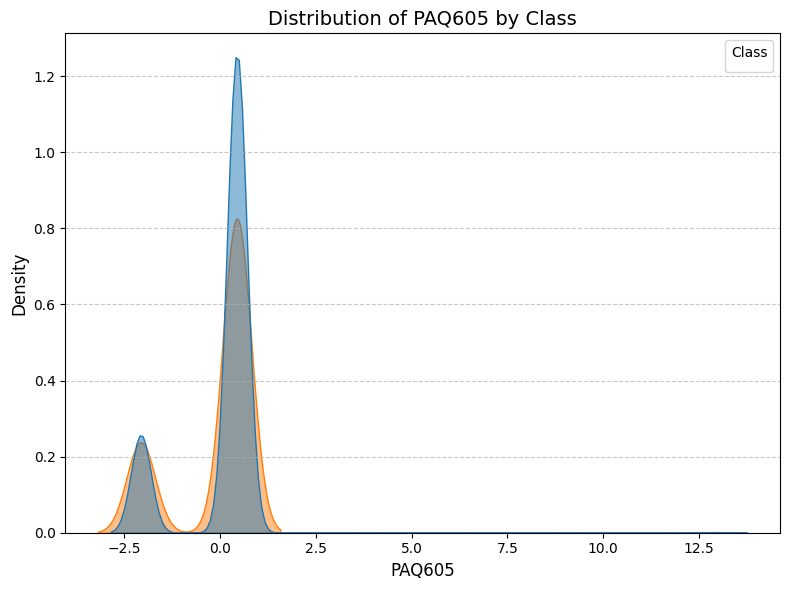

C:\Users\e1003118\AppData\Local\Temp\ipykernel_7440\3102104700.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


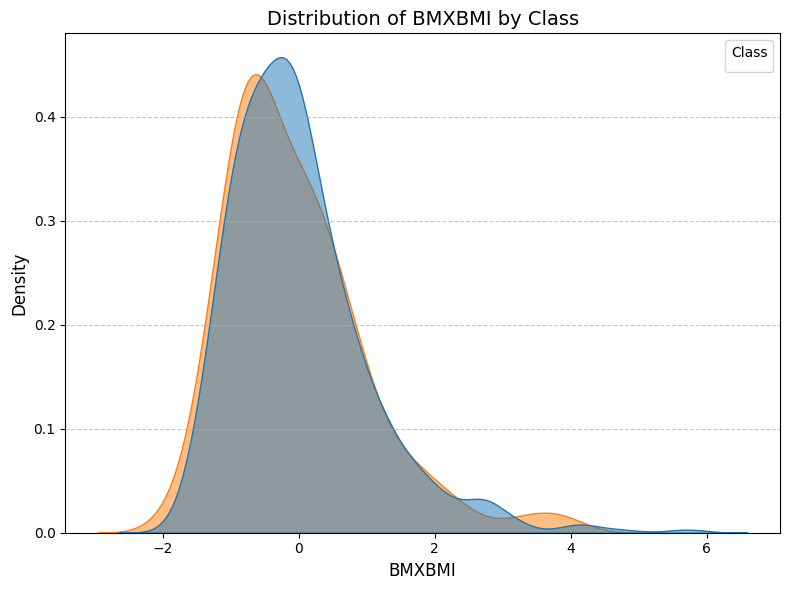

C:\Users\e1003118\AppData\Local\Temp\ipykernel_7440\3102104700.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


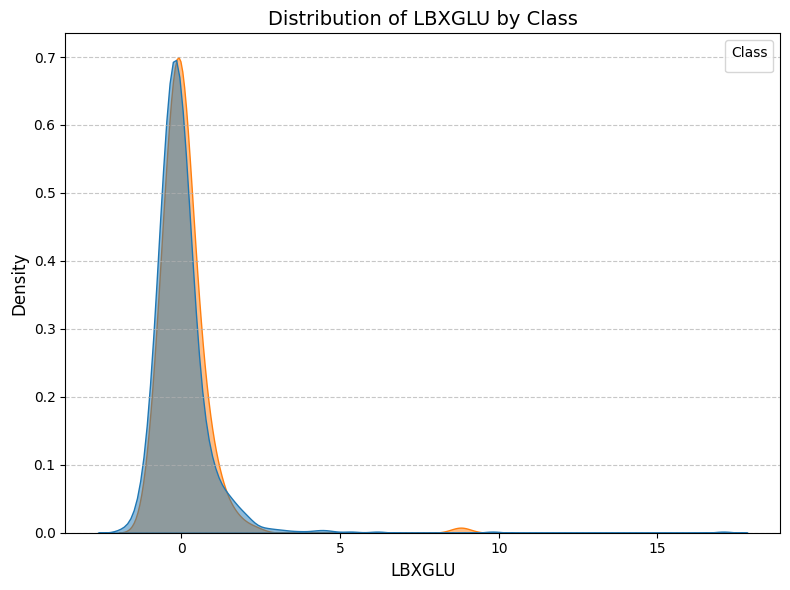

In [ ]:
# theory 2:
# If the features in your dataset have overlapping 
# distributions between classes, the generated synthetic 
# data may not help the model distinguish classes better.

import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and labels for visualization
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['Class'] = y_train

# Plot feature distributions for each class
for column in X.columns[:5]:  # Adjust to plot specific features
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=train_data, x=column, hue="Class", common_norm=False, fill=True, alpha=0.5)
    plt.title(f"Distribution of {column} by Class", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="Class")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Interpretation:
# If the distributions for different classes 
# overlap significantly for a feature, it indicates 
# that the feature might not contribute strongly 
# to distinguishing classes.
# Non-overlapping distributions suggest that 
# the feature is more discriminative.

# insights:
# almost all features overlap
# only RIAGENDR shows distinct class distributions